# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [4]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [8]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.913):
{'logistic__alpha': 0.01, 'pca__n_components': 40}


In [13]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.062164,0.008722,0.000600,0.000490,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.785714,0.729282,0.807799,0.789916,0.757746,0.774092,0.027556,13
10,8,0.065561,0.007359,0.000200,0.000400,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.903846,0.861878,0.899721,0.907563,0.839437,0.882489,0.027056,11
20,9,0.104140,0.016083,0.000400,0.000490,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.928571,0.883978,0.908078,0.949580,0.876056,0.909253,0.027356,4
30,10,0.189491,0.033248,0.000800,0.000400,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.923077,0.870166,0.924791,0.955182,0.881690,0.910981,0.031031,2
40,11,0.302629,0.045497,0.000999,0.000632,0.01,40,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.934066,0.886740,0.913649,0.946779,0.881690,0.912585,0.025512,1
50,5,0.146716,0.005772,0.000400,0.000490,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.845304,0.927577,0.952381,0.878873,0.902146,0.037317,6
64,6,0.164905,0.019778,0.000400,0.000490,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.912088,0.870166,0.916435,0.952381,0.876056,0.905425,0.029921,5


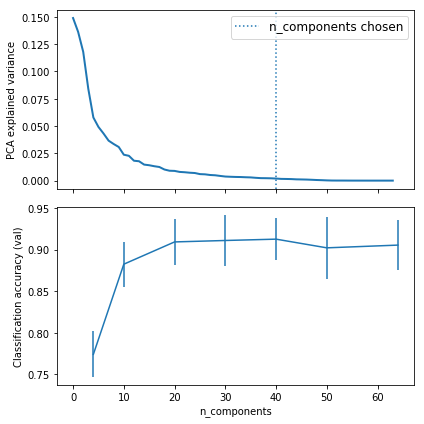

In [11]:
# 繪製不同 components 的 PCA 解釋度

pca.fit(X_digits)
fig,(ax0,ax1) = plt.subplots(nrows = 2, sharex = True, figsize = (6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth = 2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle = ":", label = 'n_components chosen')
ax0.legend(prop = dict(size = 12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

In [14]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.091745,0.015461,0.000200,4.000664e-04,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.681319,0.577348,0.679666,0.722689,0.667606,0.665725,0.047951,14
1,0.082952,0.006063,0.000600,4.895899e-04,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.890110,0.856354,0.871866,0.899160,0.850704,0.873639,0.018711,12
2,0.105739,0.004259,0.000400,4.898040e-04,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.928571,0.850829,0.908078,0.941176,0.876056,0.900942,0.033358,8
3,0.113935,0.006321,0.001200,1.469036e-03,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.923077,0.870166,0.916435,0.949580,0.887324,0.909316,0.027848,3
4,0.134723,0.020201,0.000600,4.897067e-04,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.909341,0.856354,0.919220,0.929972,0.890141,0.901005,0.025893,7
5,0.146716,0.005772,0.000400,4.897457e-04,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.845304,0.927577,0.952381,0.878873,0.902146,0.037317,6
6,0.164905,0.019778,0.000400,4.898040e-04,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.912088,0.870166,0.916435,0.952381,0.876056,0.905425,0.029921,5
7,0.062164,0.008722,0.000600,4.897067e-04,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.785714,0.729282,0.807799,0.789916,0.757746,0.774092,0.027556,13
8,0.065561,0.007359,0.000200,3.999710e-04,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.903846,0.861878,0.899721,0.907563,0.839437,0.882489,0.027056,11
9,0.104140,0.016083,0.000400,4.898040e-04,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.928571,0.883978,0.908078,0.949580,0.876056,0.909253,0.027356,4
